### Visualize Model Architecture

In [ ]:
import torch
from torchviz import make_dot

from model.time_predictor import StrideTimeEstimatorLSTM

In [ ]:
# Example model instantiation
model = StrideTimeEstimatorLSTM(input_size=10, hidden_size=20, num_layers=2, dropout=0.2)

# Dummy input
x = torch.randn(5, 12, 10)  # Batch size 5, sequence length 30, input size 10

# Forward pass
y = model(x)

# Create visualization
dot = make_dot(y, params=dict(model.named_parameters()))
dot.render("model_visualization", format="png")  # Save as PNG file

In [ ]:
from model.phase_estimator import ImprovedGaitLSTM

# Example model instantiation
model = ImprovedGaitLSTM(input_size=10, hidden_size=20, num_layers=2, dropout=0.2)

# Dummy input
x = torch.randn(5, 12, 10)  # Batch size 5, sequence length 30, input size 10

# Forward pass
y = model(x)

# Create visualization
dot = make_dot(y, params=dict(model.named_parameters()))
dot.render("model_visualization", format="png")  # Save as PNG file

In [2]:
# Set font sizes globally for all plots
plt.rcParams.update({
    "font.size": 14,  # Default font size
    "axes.titlesize": 18,  # Title font size
    "axes.labelsize": 16,  # Axis labels font size
    "xtick.labelsize": 14,  # X-tick labels font size
    "ytick.labelsize": 14,  # Y-tick labels font size
    "legend.fontsize": 14,  # Legend font size
    "figure.titlesize": 20,  # Figure title font size
})

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


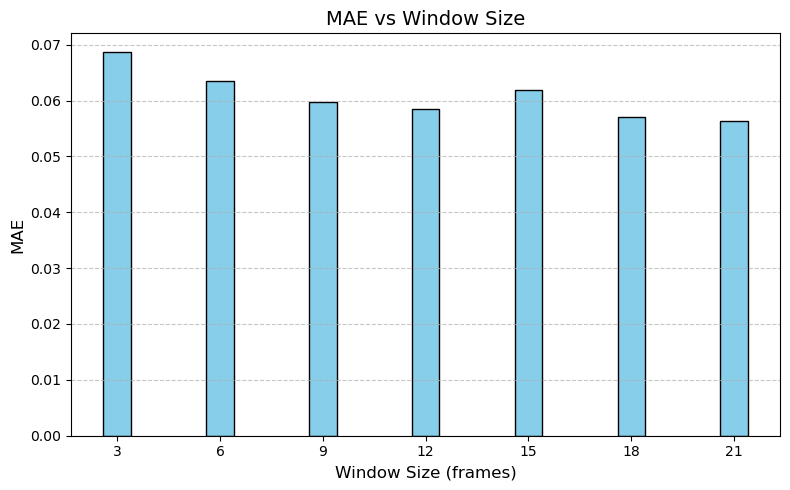

In [2]:
import matplotlib.pyplot as plt

# Data
window_sizes = [3, 6, 9, 12, 15, 18, 21]
# mae_values = [0.06919, 0.07234, 0.06715, 0.06618, 0.06639, 0.05692, 0.05834]
mae_values = [0.06860, 0.06343, 0.05973, 0.05855, 0.06180, 0.05709, 0.05630]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(window_sizes, mae_values, color='skyblue', edgecolor='black')
plt.xlabel('Window Size (frames)', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('MAE vs Window Size', fontsize=14)
plt.xticks(window_sizes)  # Set x-axis ticks to window sizes
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for readability

# Display the plot
plt.tight_layout()
plt.show()

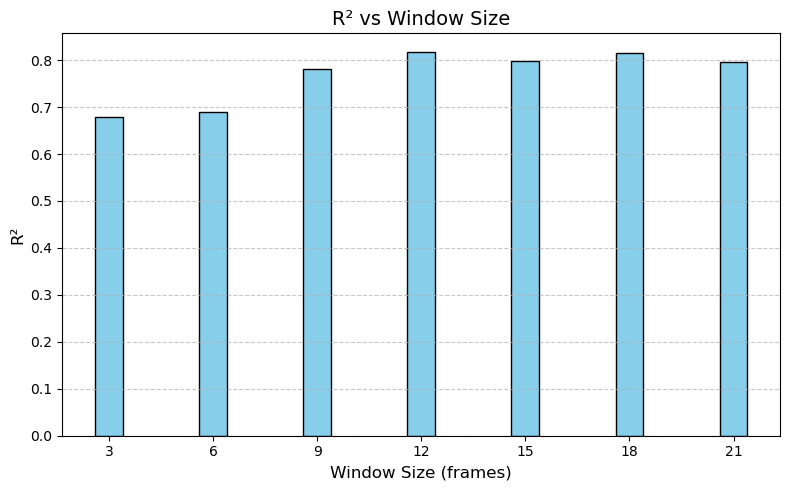

In [3]:
import matplotlib.pyplot as plt

# Data
window_sizes = [3, 6, 9, 12, 15, 18, 21]
# r2_values = [0.6941, 0.6802, 0.7369, 0.7619, 0.7765, 0.8422, 0.8121]
r2_values = [0.6789, 0.6902, 0.7800, 0.8162, 0.7985, 0.8153, 0.7968]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(window_sizes, r2_values, color='skyblue', edgecolor='black')
plt.xlabel('Window Size (frames)', fontsize=12)
plt.ylabel('R²', fontsize=12)
plt.title('R² vs Window Size', fontsize=14)
plt.xticks(window_sizes)  # Set x-axis ticks to window sizes
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a horizontal grid for readability

# Display the plot
plt.tight_layout()
plt.show()

### Plot MAE and R2

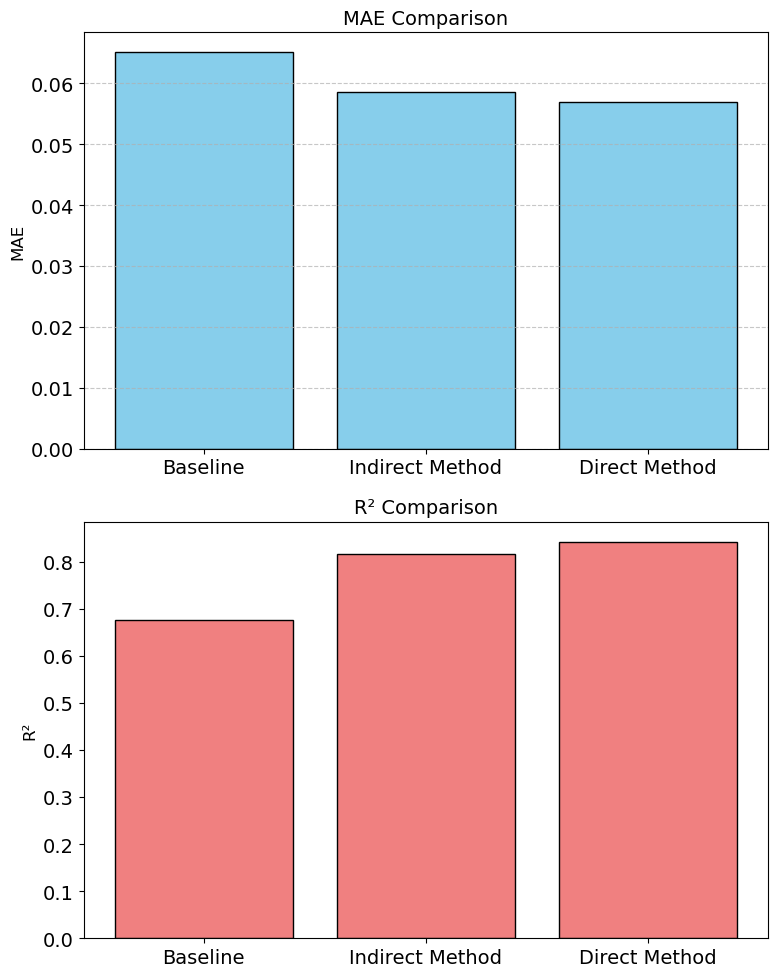

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each method
methods = ['Baseline', 'Indirect Method', 'Direct Method']
mae_values = [0.06508610812746152, 0.058546162921047744, 0.056916557252407074]
r2_values = [0.6764309859641544, 0.8161703405208027, 0.8421944379806519]

# Set font sizes globally for all plots
plt.rcParams.update({
    "font.size": 14,  # Default font size
    "axes.titlesize": 18,  # Title font size
    "axes.labelsize": 16,  # Axis labels font size
    "xtick.labelsize": 14,  # X-tick labels font size
    "ytick.labelsize": 14,  # Y-tick labels font size
    "legend.fontsize": 14,  # Legend font size
    "figure.titlesize": 20,  # Figure title font size
})

# Plot the MAE and R2 scores in separate subplots
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# MAE plot
axs[0].bar(methods, mae_values, color='skyblue', edgecolor='black')
axs[0].set_ylabel('MAE', fontsize=12)
axs[0].set_title('MAE Comparison', fontsize=14)
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# R2 plot
axs[1].bar(methods, r2_values, color='lightcoral', edgecolor='black')
axs[1].set_ylabel('R²', fontsize=12)
axs[1].set_title('R² Comparison', fontsize=14)

# Display the plot
plt.tight_layout()
plt.show()

In [6]:
# Calculate the reduction of MAE and increase of R² for the indirect method
mae_reduction = (mae_values[0] - mae_values[1]) / mae_values[0] * 100
r2_increase = (r2_values[1] - r2_values[0]) / r2_values[0] * 100

# Print the results
print("Indirect Method:")
print(f"MAE Reduction: {mae_reduction:.2f}%")
print(f"R² Increase: {r2_increase:.2f}%")

# Calculate the reduction of MAE and increase of R² for the direct method
mae_reduction = (mae_values[0] - mae_values[2]) / mae_values[0] * 100
r2_increase = (r2_values[2] - r2_values[0]) / r2_values[0] * 100

# Print the results
print("Direct Method:")
print(f"MAE Reduction: {mae_reduction:.2f}%")
print(f"R² Increase: {r2_increase:.2f}%")

Indirect Method:
MAE Reduction: 10.05%
R² Increase: 20.66%
Direct Method:
MAE Reduction: 12.55%
R² Increase: 24.51%
